In [1]:
import pandas as pd
import pydot
from IPython.display import SVG

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Load causal algorithms from the py-causal library and Run FOFC Continuous

In [4]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'fofc')

alpha: Cutoff for p values (alpha) (min = 0.0) (java.lang.Double) [default:0.01]
useWishart: Yes if the Wishart test shoud be used. No if the Delta test should be used (java.lang.Boolean) [default:false]
useGap: Yes if the GAP algorithms should be used. No if the SAG algorithm should be used (java.lang.Boolean) [default:false]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:false]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]


In [5]:
tetrad.run(algoId = 'fofc', dfs = df,
           alpha = 0.05, 
           useWishart = True, useGap = True, verbose = True)

#### FOFC Continuous' Result's Nodes

In [6]:
tetrad.getNodes()

[u'TangibilityCondition',
 u'AmountDonated',
 u'Sympathy',
 u'Imaginability',
 u'Impact',
 u'_L1']

#### FOFC Continuous' Result's Edges

In [7]:
tetrad.getEdges()

[u'_L1 --> AmountDonated',
 u'_L1 --> TangibilityCondition',
 u'_L1 --> Imaginability',
 u'_L1 --> Sympathy',
 u'_L1 --> Impact']

#### Plot The Result's Graph

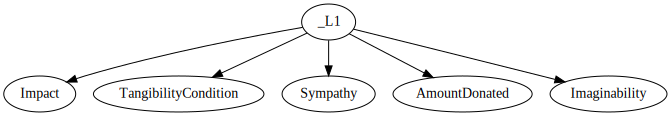

In [8]:
dot = tetrad.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

#### Stop Java VM

In [9]:
pc.stop_vm()